In [36]:
import datetime
import io
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import snp
import yfinance as yf
from dotenv import load_dotenv
from IPython.display import clear_output

In [14]:
load_dotenv()

DATASET_DIR = "./dataset/"
DATASET_CSV = DATASET_DIR + "%s.csv"

TICKER_LIMIT = 500
PERIOD = "max"
INTERVAL = "1d"

In [15]:
def get_csv_name(ticker):
    return DATASET_CSV % (ticker)

In [ ]:
# download data - yfinance
snp_tickers = snp.snp500_tickers()[:TICKER_LIMIT]
for i, t in enumerate(snp_tickers):
    try:
        df = yf.download(
            t, period=PERIOD, interval=INTERVAL, progress=False, rounding=True
        )

        df.to_csv(get_csv_name(t))
        df = pd.read_csv(get_csv_name(t))

        # rename columns, delete unnecessary rows, cut timestamp time
        df.rename(
            columns={
                "Price": "timestamp",
                "Open": "open",
                "High": "high",
                "Low": "low",
                "Close": "close",
                "Volume": "volume",
                "Adj Close": "adj_close",
            },
            inplace=True,
        )
        df.drop(index=[0, 1], inplace=True)
        df["timestamp"] = df["timestamp"].str.replace(" 00:00:00+00:00", "")
        # Convert 'timestamp' to datetime
        df["timestamp"] = pd.to_datetime(df["timestamp"])

        print(
            f"Ticker: {t} {i + 1}/{len(snp_tickers)} ({round((i + 1) / len(snp_tickers) * 100, 2)}%)"
        )
        print(df.head())
        clear_output(wait=True)

        df.to_csv(get_csv_name(t), index=False)

    except KeyboardInterrupt as e:
        print(e)
        break

In [5]:
# alpha vantage wrapper
ALPHA_VANTAGE_URL = "https://www.alphavantage.co"
ALPHA_VANTAGE_DAILY = "TIME_SERIES_DAILY"
ALPHA_VANTAGE_CSV = "csv"
ALPHA_VANTAGE_FULL = "full"
ALPHA_VONTAGE_API_KEY = os.environ.get("ALPHA_VONTAGE_API_KEY")


def alpha_vontage_get(
    function: str,
    symbol: str,
    outputsize: str,
    datatype: str,
    apikey: str = ALPHA_VONTAGE_API_KEY,
):
    url = f"{ALPHA_VANTAGE_URL}/query?function={function}&symbol={symbol}&outputsize={outputsize}&datatype={datatype}&apikey={apikey}"
    r = requests.get(url)

    return r

In [ ]:
# download data - alpha vantage
snp_tickers = snp.snp500_tickers()[:TICKER_LIMIT]
for i, t in enumerate(snp_tickers):
    try:
        r = alpha_vontage_get(
            ALPHA_VANTAGE_DAILY, t, ALPHA_VANTAGE_FULL, ALPHA_VANTAGE_CSV
        )
        df = pd.read_csv(io.StringIO(r.content.decode("utf-8")))

        print(
            f"Ticker: {t} {i}/{len(snp_tickers)} ({round(i / len(snp_tickers) * 100, 2)}%)"
        )
        print(df.head())
        clear_output(wait=True)

        df.to_csv(get_csv_name(t), index=False)

    except KeyboardInterrupt as e:
        print(e)
        break

In [ ]:
# load data
t = snp_tickers[0]
df = pd.read_csv(get_csv_name(t))
df["timestamp"] = pd.to_datetime(df["timestamp"])

print(f"Ticker: {t}")
print(df.head())
print(df.dtypes)

Ticker: MMM
    timestamp  adj_close  close  high   low  open  volume
0  1962-01-02       0.57   3.48  3.55  3.45   0.0  254509
1  1962-01-03       0.57   3.50  3.50  3.42   0.0  505190
2  1962-01-04       0.57   3.50  3.56  3.50   0.0  254509
3  1962-01-05       0.56   3.41  3.49  3.40   0.0  376979
4  1962-01-08       0.55   3.39  3.42  3.37   0.0  399942
timestamp     object
adj_close    float64
close        float64
high         float64
low          float64
open         float64
volume         int64
dtype: object


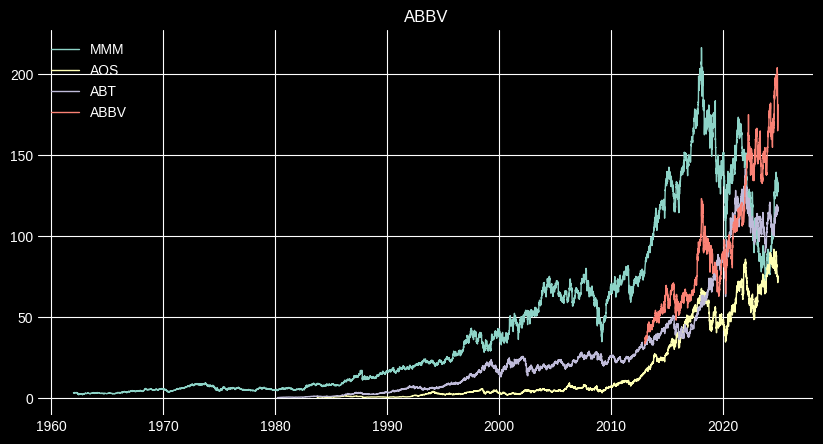

In [ ]:
plt.style.use("default")
plt.style.use("seaborn-v0_8-darkgrid")
plt.style.use("dark_background")

# Plot the 'close' price against the 'timestamp'
plt.figure(figsize=(10, 5))

ts = snp_tickers[:4]
for t in ts:
    df = pd.read_csv(get_csv_name(t))
    plt.plot(df["timestamp"], df["close"], label="Close Price", linewidth=1)

plt.title(t)
plt.grid(True)
plt.legend([t for t in ts])

plt.show()